<a href="https://colab.research.google.com/github/nicklausmillican/ISLP_Python/blob/main/ISLP_Python_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4

## Conceptual

### Question 1
Using a little bit of algebra, prove that (4.2)
$$p(X) = \frac{e^{X\beta}}{1 + e^{X\beta}}$$
is equivalent to (4.3).
$$\frac{p(X)}{1-p(X)} = e^{X\beta}$$

(NOTE: The book uses slightly different exponents, $\beta_0 + \beta_1 X$, but use this abbreviated version for ease.)

In other words, the logistic function representation and logit representation for the logistic regression model are equivalent.

#### Answer
Let's start with the definition of odds.  For ease, I'll use $p$ instead of $p(X)$.

$$odds = \frac{p}{1-p}$$

The logistic function is the *log odds*, which is equal to our linear model.

$$log odds = log(\frac{p}{1-p}) = X\beta$$.

We can retrieve equation (4.3) by exponentiating both sides

$$e^{log(\frac{p}{1-p})} = \frac{p}{1-p} = e^{X\beta}$$

Now we must solve for $p$ to get equation (4.2).

$$p = e^{X\beta}(1-p) = e^{X\beta} - pe^{X\beta} \rightarrow$$

$$p + pe^{X\beta} = p(1 + X\beta) \rightarrow$$

$$p = \frac{e^{X\beta}}{1 + e^{X\beta}}$$



### Question 2
It was stated in the text that classifying an observation to the class for which (4.17)

$$p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2 \pi \sigma}} exp(-\frac{1}{2 \sigma^2}(x-\mu_k)^2)}{\sum_{l=1}^K \pi_l \frac{1}{\sqrt{2 \pi \sigma}} exp(-\frac{1}{2 \sigma^2}(x-\mu_l)^2)}$$

is largest is equivalent to classifying an observation to the class for which (4.18)

$$\delta_k(x) = x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + log(\pi_k)$$

is largest. Prove that this is the case. In other words, under the assumption that the observations in the kth class are drawn from a $N(µ_k, σ^2)$ distribution, the Bayes classifier assigns an observation to the class for which the discriminant function is maximized.

#### Answer
The way I'm going to do this is to show that $\delta_k$ is proportional to the log of the numerator of Bayes' Theorem (when the likelihood is a normal distribution).  Since a log a monotonic transformation, the max of the log-transformed variable corresponds to the max of the untransformed variable.  In Bayes', the value $k$ that gives the largest numerator is the most probable; the denominator cancels out since every expression across all $K$ values uses the same denominator.  Thus, the greatest $\delta_k$ corresponds to most probable value.

Let's start by simplifying the notation.

$$p_k(x) = \frac{\pi_k \times f_k(x)}{M}$$

where $\pi_k$ is the prior probability for $k$, $f_k(x)$ is the normally-distributed likelihood

$$f_k(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x-\mu_k)^2)$$

and $M$ is the marginal distribution

$$M = \sum_{l=1}^K \pi_l \times f_l(x) = {\sum_{l=1}^K \pi_l \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x-\mu_l)^2)}$$.

If we then take the log of $p_k(x)$, we get

$$ln[p_k(X)] = ln[\pi_k] + ln[f_k(x)] - ln[M]$$.

Now I'm going to expand $ln[f_k(x)]$.

$$ln[p_k(X)] = ln[\pi_k] + ln[\frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x-\mu_k)^2)] - ln[M]$$

$$= ln[\pi_k] + ln[\frac{1}{\sqrt{2 \pi \sigma^2}}] -\frac{1}{2 \sigma^2}(x-\mu_k)^2) - ln[M]$$

$$= ln[\pi_k] + ln[(2 \pi \sigma^2)^{-1/2}] -\frac{1}{2 \sigma^2}(x-\mu_k)^2) - ln[M]$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma^2] + \frac{(x- \mu_k)^2}{\sigma^2}) - lm[M])$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma^2] + \frac{x^2}{\sigma^2} - \frac{2 x \mu_k}{\sigma^2} + \frac{\mu_k^2}{\sigma^2}) - lm[M])$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma^2]) - \frac{x^2}{2 \sigma^2} + \frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2}) - lm[M])$$

We're in the home stretch.  If we look at our expression, we recognize a few terms that are shared with $\delta_k$; namely, those that reference $k$.  This should make sense, only values that depend on the $k^{th}$ option can distinguish among $\delta$ expressions.  Thus, we can drop all terms without reference to $k$, and we get $\delta_k$.

$$\delta_k = ln[\pi_k] + \frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2}$$

$$= x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + log(\pi_k)$$.

### Question 3
This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class specific mean vector and a class specific covariance matrix. We consider the simple case where $p = 1$; i.e. there is only one feature.

Suppose that we have $K$ classes, and that if an observation belongs to the $k^{th}$ class then $X$ comes from a one-dimensional normal distribution, $X ∼ N(µ_k, σ^2_k)$. Recall that the density function for the one-dimensional normal distribution is given in (4.16)

$$f_k(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{1}{2 \sigma^2}(x-\mu_k)^2)$$

Prove that in this case, the Bayes classifier is not linear. Argue that it is in fact quadratic.

*Hint: For this problem, you should follow the arguments laid out in Section 4.4.1, but without making the assumption that $σ^2_1 = ... = σ^2_K$.*

#### Answer
In the solution to Question 2 (above), we found $\delta_k$ to be proportional to the likelihood of Bayes' theorem when the likelihood is normally distributed.  In that derivation, we assumed that $σ^2_1 = ... = σ^2_K$, and this yielded the $\delta(x)$ function

$$\delta_k(x) = x \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} + log(\pi_k)$$.

We say that this $\delta(x)$ is "linear" in $x$ since the highest degree of $x$ is 1, $x=x^1$.  If there was an $x^2$ in there, we'd say that $\delta(x)$ was "quadratic" in $x$; and if an $x^3$, we'd say "cubic"...and so on.

Here, we're told that if do NOT assume $σ^2_1 = ... = σ^2_K$, then $\delta(x)$ is quadratic in $x$.  Let's try to derive this; we'll use the same steps as we did for Question 2.

Start again by simplifying the notation.

$$p_k(x) = \frac{\pi_k \times f_k(x)}{M}$$

where $\pi_k$ is the prior probability for $k$, $f_k(x)$ is the normally-distributed likelihood

$$f_k(x) = \frac{1}{\sqrt{2 \pi \sigma_k^2}} exp(-\frac{1}{2 \sigma_k^2}(x-\mu_k)^2)$$

and $M$ is the marginal distribution

$$M = \sum_{l=1}^K \pi_l \times f_l(x) = {\sum_{l=1}^K \pi_l \frac{1}{\sqrt{2 \pi \sigma_l^2}} exp(-\frac{1}{2 \sigma_l^2}(x-\mu_l)^2)}$$.

This time, we are sure to identify the variance of the $k^{th}$ and $l^{th}$ categories by $\sigma_k^2$ and $\sigma_l^2$.

If we then take the log of $p_k(x)$, expanding the term for $f_k(x)$, we get

$$ln[p_k(x)] = ln[\pi_k] + ln[\frac{1}{\sqrt{2 \pi \sigma_k^2}} exp(-\frac{1}{2 \sigma_k^2}(x-\mu_k)^2)] - ln[M]$$

$$= ln[\pi_k] + ln[\frac{1}{\sqrt{2 \pi \sigma_k^2}}] -\frac{1}{2 \sigma_k^2}(x-\mu_k)^2) - ln[M]$$

$$= ln[\pi_k] + ln[(2 \pi \sigma_k^2)^{-1/2}] -\frac{1}{2 \sigma_k^2}(x-\mu_k)^2) - ln[M]$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2] + \frac{(x- \mu_k)^2}{\sigma_k^2}) - ln[M])$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2] + \frac{x^2}{\sigma_k^2} - \frac{2 x \mu_k}{\sigma_k^2} + \frac{\mu_k^2}{\sigma_k^2}) - ln[M])$$

$$= ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2]) - \frac{x^2}{2 \sigma_k^2} + \frac{x \mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2 \sigma_k^2} - ln[M])$$

Now we're basically done.  Let's compare the expression we just derived, for QDA (with $\sigma_k^2$), to the expression we previously derived, for LDA (with $\sigma^2$, instead).

$$ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2]) - \frac{x^2}{2 \sigma_k^2} + \frac{x \mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2 \sigma_k^2} - ln[M])$$

$$vs$$

$$ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma^2]) - \frac{x^2}{2 \sigma^2} + \frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2} - ln[M])$$

When we derived the $\delta(x)$ expression for LDA, we discarded the terms of $ln[p_k(X)]$ that did not reference $x$, leaving

$$\delta_k^{LDA}(x) = ln[\pi_k] + \frac{x \mu_k}{\sigma^2} - \frac{\mu_k^2}{2 \sigma^2}$$

Let us do the same for QDA.  We now see that every term except $ln[M]$ references $k$, including $\frac{x^2}{2 \sigma_k^2}$, thus making the $\delta(X)$ function for QDA quadratic in $x$.

$$\delta_k^{QDA}(x) = ln[\pi_k] - \frac{1}{2}(ln[2 \pi \sigma_k^2]) - \frac{x^2}{2 \sigma_k^2} + \frac{x \mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2 \sigma_k^2}$$

##### Bonus
The LDA decision boundary for categories $a$ and $b$ occurs when $\delta_a = \delta_b$.  Importantly, $\delta_k$ for LDA assumed that each $k \in K$ had the same variance $σ^2_1 = ... = σ^2_K.$.  Under this assumption, we found that the Bayes' decision boundary occurs when

$$x \frac{\mu_a}{\sigma^2} - \frac{\mu_a^2}{2 \sigma^2} + log(\pi_a)
= x \frac{\mu_b}{\sigma^2} - \frac{\mu_b^2}{2 \sigma^2} + log(\pi_b)$$

$$\rightarrow x \frac{\mu_a}{\sigma^2} - x \frac{\mu_b}{\sigma^2} + log(\pi_a)
= \frac{\mu_a^2}{2 \sigma^2} - \frac{\mu_b^2}{2 \sigma^2} + log(\pi_b)$$

$$= \frac{x(\mu_a - \mu_b)}{\sigma^2} + log(\pi_a) = \frac{1}{2} \frac{\mu^2_a - \mu^2_b}{\sigma^2} + log(\pi_b)$$

$$\rightarrow 2x(\mu_a - \mu_b) + 2log(\pi_a)\sigma^2 = \mu^2_a - \mu^2_b + 2log(\pi_b)\sigma^2$$

$$\rightarrow x = \frac{\mu^2_a - \mu^2_b}{2(\mu_a - \mu_b)} + \frac{log(\pi_b / \pi_a)\sigma^2}{(\mu_a - \mu_b)}$$

If $\pi_a = \pi_b$, then this simplifies to

$$x = \frac{\mu^2_a - \mu^2_b}{2(\mu_a - \mu_b)}$$

But in quadratic discriminant analysis (QDA), we allow each category to have individual variances.  How will this change our derivation for the decision boundary?

$$ln[\pi_a] - \frac{1}{2}(ln[2 \pi \sigma_a^2]) - \frac{x^2}{2 \sigma_a^2} + \frac{x \mu_a}{\sigma_a^2} - \frac{\mu_a^2}{2 \sigma_a^2}
= ln[\pi_b] - \frac{1}{2}(ln[2 \pi \sigma_b^2]) - \frac{x^2}{2 \sigma_b^2} + \frac{x \mu_b}{\sigma_b^2} - \frac{\mu_b^2}{2 \sigma_b^2}$$

$$\rightarrow ln[\pi_a] - ln[\pi_b] + \frac{1}{2}(ln[2 \pi \sigma_b^2]) - \frac{1}{2}(ln[2 \pi \sigma_a^2]) + \frac{x^2}{2 \sigma_b^2} - \frac{x^2}{2 \sigma_a^2} + \frac{x \mu_a}{\sigma_a^2} - \frac{x \mu_b}{\sigma_b^2} + \frac{\mu_b^2}{2 \sigma_b^2} - \frac{\mu_a^2}{2 \sigma_a^2} = 0$$

$$\rightarrow 2ln[\frac{\pi_a}{\pi_b}] + ln[\frac{\sigma^2_b}{\sigma^2_a}] + \frac{x^2}{\sigma_b^2} - \frac{x^2}{\sigma_a^2} + \frac{2x \mu_a}{\sigma_a^2} - \frac{2x \mu_b}{\sigma_b^2} + \frac{\mu_b^2}{\sigma_b^2} - \frac{\mu_a^2}{\sigma_a^2} = 0$$

$$\rightarrow ln[\frac{\pi^2_a \sigma^2_b}{\pi^2_b \sigma^2_a}] + x^2(\frac{\sigma^2_a - \sigma^2_b}{\sigma^2_a \sigma^2_b}) + x(\frac{2(\mu_a \sigma^2_b - \mu_b \sigma^2_a)}{\sigma^2_a \sigma^2_b}) + \frac{\mu^2_b \sigma^2_a - \mu^2_a \sigma^2_b}{\sigma^2_a \sigma^2_b} = 0$$

$$\rightarrow x^2(\frac{\sigma^2_a - \sigma^2_b}{\sigma^2_a \sigma^2_b}) + x(\frac{2(\mu_a \sigma^2_b - \mu_b \sigma^2_a)}{\sigma^2_a \sigma^2_b}) + (\frac{\mu^2_b \sigma^2_a - \mu^2_a \sigma^2_b}{\sigma^2_a \sigma^2_b} + ln[\frac{\pi^2_a \sigma^2_b}{\pi^2_b \sigma^2_a}]) = 0$$

$$\rightarrow Ax^2 + Bx + C = 0$$

Thus, we have a quadratic equation. In other words, our decision boundary is also quadratic in $x$ for QDA.  We can solve this with the quadratic formula:

$$x = \frac{-B \pm \sqrt{B^2 - 4AC}}{2A}$$

I won't solve that here; it's just an exercise in algebra.

#### Check out the Desmos Demo
I made a demo of this in Desmos.  You can check it out [here](https://www.desmos.com/calculator/qbdkdiuipt).

Start by noticing what happens with the priors are equal (in Desmos, $p_a = p_b$).  The LDA decision boundary is exactly where the two distributions meet.  As you move $p_a$ to become higher, $p_b$ gets lower and so the decision boundary encroaches on b's territory.

When the variances are equal (in Desmos, $s_a = s_b$), there is not QDA boundary.  Only when they are not equal do these emerge.  At the same time, the LDA boundary no longer intersects where a and b are equal (when $p_a = p_b$).

With just 1 predictor variable, the QDA boundaries are a little difficult to map to the behavior of the normal distributions.  Hopefully, a 2-predictor variable question will show up later.

### Question 4
When the number of features $p$ is large, there tends to be a deterioration in the performance of KNN and other *local* approaches that perform prediction using only observations that are *near* the test observation for which a prediction must be made. This phenomenon is known as the curse of *dimensionality*, and it ties into the fact that non-parametric approaches often perform poorly when $p$ is large. We will now investigate this curse.

>   (a) Suppose that we have a set of observations, each with measurements on $p = 1$ feature, $X$. We assume that $X$ is uniformly (evenly) distributed on [0, 1]. Associated with each observation is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within 10% of the range of $X$ closest to that test observation. For instance, in order to predict the response for a test observation with $X = 0.6$, we will use observations in the range [0.55, 0.65]. On average, what fraction of the available observations will we use to make the prediction?

>   (b) Now suppose that we have a set of observations, each with measurements on $p = 2$ features, $X_1$ and $X_2$. We assume that $(X_1, X_2)$ are uniformly distributed on [0, 1] × [0, 1]. We wish to predict a test observation’s response using only observations that are within 10% of the range of $X_1$ and within 10% of the range of $X_2$ closest to that test observation. For instance, in order to predict the response for a test observation with $X_1 = 0.6$ and $X_2 = 0.35$, we will use observations in the range [0.55, 0.65] for $X_1$ and in the range [0.3, 0.4] for $X_2$. On average, what fraction of the available observations will we use to make the prediction?

>   (c) Now suppose that we have a set of observations on $p = 100$ features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10% of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

>   (d) Using your answers to parts (a)–(c), argue that a drawback of KNN when $p$ is large is that there are very few training observations “near” any given test observation.

>   (e) Now suppose that we wish to make a prediction for a test observation by creating a p-dimensional hypercube centered around the test observation that contains, on average, 10% of the training observations. For $p = 1, 2, 100$, what is the length of each side of the hypercube? Comment on your answer.

>   *Note: A hypercube is a generalization of a cube to an arbitrary number of dimensions. When $p = 1$, a hypercube is simply a line segment, when $p = 2$ it is a square, and when $p = 100$ it is a 100-dimensional cube.*

#### Answers

##### Answer to a
The answer to the first part is stright forward.  Let's call the proportion of $X$ we will use $r_X$.  Here, $r_{x} = 0.10$, or 10%.  Since $x$ represents all of the data, then the proportion of data available is also 10%.  Let's call the proportion of data available $a_X$; so here, $a_X = r_X$.

>In the example, we are looking for $0.55 \ge x \ge 0.65$, which is $r_x=0.10$ of the data.  Since $x$ is the only data, we have $a_x = r_x = 0.10$ of observations available.  That means that if we have $n=100$ observations, then on average, 10 will be between 0.55 and 0.65.  We can get some intuition for this by simulation.

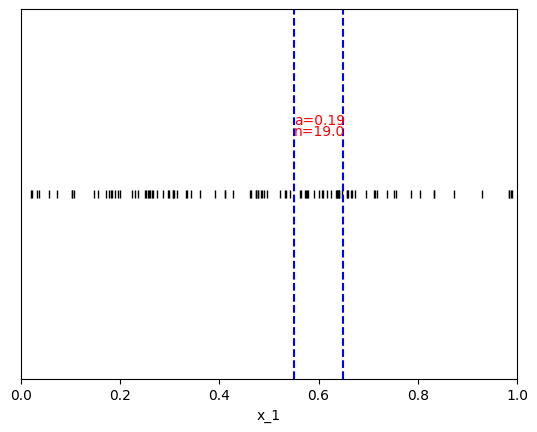

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
r = 0.1
x = np.random.uniform(low=0, high=1, size=n)
a_1_est = np.sum((x > 0.55) & (x < 0.65)) / n
n_1_est = a_1_est * n

plt.figure()
plt.plot(x, np.zeros_like(x), ' ', label="x_1")  # Creating an empty plot to set the x-axis limits
plt.xlim(0, 1)
plt.ylim(-0.1, 0.1)
plt.yticks([])  # Remove y-axis ticks
plt.xlabel("x_1")

plt.plot(x, np.zeros_like(x), '|', color='black')  # Rug plot
plt.axvline(x=0.55, linestyle='--', color='blue')
plt.axvline(x=0.65, linestyle='--', color='blue')
plt.text(0.55, 0.038, f"a={round(a_1_est, 2)}", color='red')
plt.text(0.55, 0.032, f"n={round(n_1_est, 0)}", color='red')

plt.show()

The little ticks along the x-axis are data points.  The interval between the dotted lines is the 10% interval between $x = 0.55$ an $x = 0.65$.  The text in that interval is the estimate for $a$.  Run this a few times.  You'll see that we get estimates for $a$ of around 10%, just as we reasoned above.

##### Answer to b
But what if we have two variables, $x_1$ and $x_2$.  Let's simulate first.

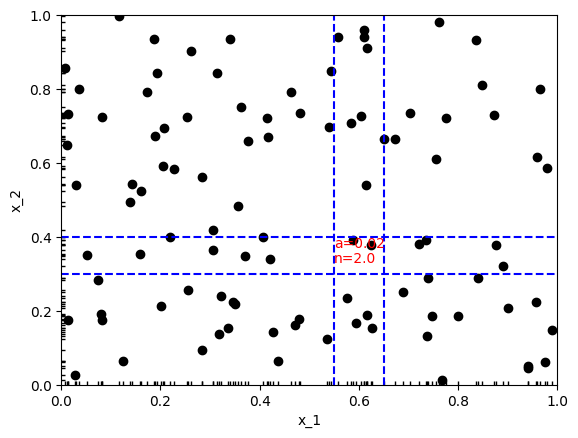

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x_1 = np.random.uniform(low=0, high=1, size=n)
x_2 = np.random.uniform(low=0, high=1, size=n)
r_1 = 0.10
r_2 = 0.10
a_2_est = np.sum(((x_1 > 0.55) & (x_1 < 0.65)) & ((x_2 > 0.3) & (x_2 < 0.4))) / n
n_2_est = a_2_est * n

plt.figure()
plt.scatter(x_1, x_2, label="x_2 vs x_1", color='black')  # Scatter plot for x_2 vs x_1
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.plot(x_1, np.zeros_like(x_1), '|', color='black')  # Rug plot for x_1
plt.plot(np.zeros_like(x_2), x_2, '_', color='black')  # Rug plot for x_2
plt.axvline(x=0.55, linestyle='--', color='blue')
plt.axhline(y=0.3, linestyle='--', color='blue')
plt.axvline(x=0.65, linestyle='--', color='blue')
plt.axhline(y=0.4, linestyle='--', color='blue')
plt.text(0.55, 0.37, f"a={round(a_2_est, 2)}", color='red')
plt.text(0.55, 0.33, f"n={round(n_2_est, 0)}", color='red')

plt.show()

Run this a few times and you'll get estimated $a$ values around 1%.  So when $p=1$, we get $a_1 = 0.10$; for $p=2$, we get $a_2 = 0.01$--which is $a_2 = 0.10 \times 0.10 = 0.10^2$.  This makes sense: with $x_1$, we get 10% of the observations; imposing a second restriction with $a_2$ and now we get 10% of the 10%.

This trend continues for an number of parameters $p$ for any proportion of data $r$:
$$a_p = r^p$$

##### Answer to c
If we extend to $p = 100$, keeping $r = 0.10$, we get $a_{100} = 0.10^{100}$, which is basically $0$.  This informs our answer to (d).

##### Answer to d
As $p$ gets large, there is an increasingly good chance that we will have few-to-no data with which to make good inferences.  The data become too sparse across the p-dimenions.

##### Answer to e
Since data becomes increasingly sparse as $p$ increases, we will need to increase the length of the sides our hypercube $l$ to capture the same $r$.

When we have $p=1$ dimensions, we can find $l$ as
$$l_p = r^p$$
such that when $r=0.10$,
$$l_1 = 0.10^1 = 0.10$$
As $p$ increases, data becomes sparse like $r^p$.  So to counteract this, we need to expand $l$ like $r^{1/p}$.  So if we look at $p=1$, $p=2$, ..., $p=100$,...
$$l_1 = r^{1/1} = 0.10^1 = 0.10$$
$$l_2 = r^{1/2} = 0.10^{1/2} = 0.32$$
$$l_3 = r^{1/3} = 0.10^{1/3} = 0.46$$
$$...$$
$$$$l_100 = r^{1/100} = 0.10^{1/100} = 0.98$$$$
Notice that as $p$ increases, $l$ must expand towards the limits of the data.

Ultimately what we're doing by expanding $l$ with $p$ is trying to capture the same amount of data; we must expand $l$ because that data is now spread over more dimensions.  Let's look at a simulation.

We'll start by capturing $a_1 = 0.10$ of the data in $p=1$ dimension. This is the same as the first simulation we ran.

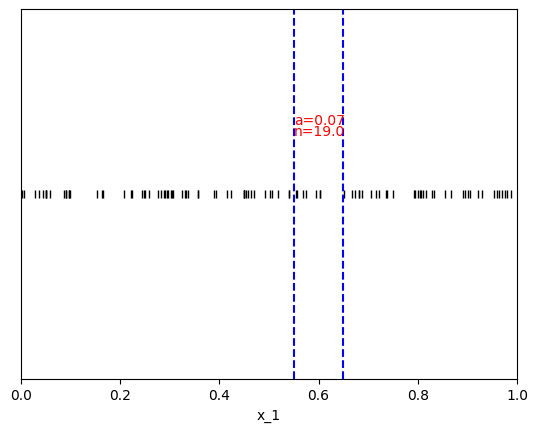

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
r = 0.1
x = np.random.uniform(low=0, high=1, size=n)
a_1_est = np.sum((x > 0.55) & (x < 0.65)) / n
n_2_est = a_1_est * n

plt.figure()
plt.plot(x, np.zeros_like(x), ' ', label="x_1")  # Creating an empty plot to set the x-axis limits
plt.xlim(0, 1)
plt.ylim(-0.1, 0.1)
plt.yticks([])  # Remove y-axis ticks
plt.xlabel("x_1")

plt.plot(x, np.zeros_like(x), '|', color='black')  # Rug plot
plt.axvline(x=0.55, linestyle='--', color='blue')
plt.axvline(x=0.65, linestyle='--', color='blue')
plt.text(0.55, 0.038, f"a={round(a_1_est, 2)}", color='red')
plt.text(0.55, 0.032, f"n={round(n_1_est, 0)}", color='red')

plt.show()

Now let's expand this to 2 dimenions.  We already saw that doing this decreases $a_p$.

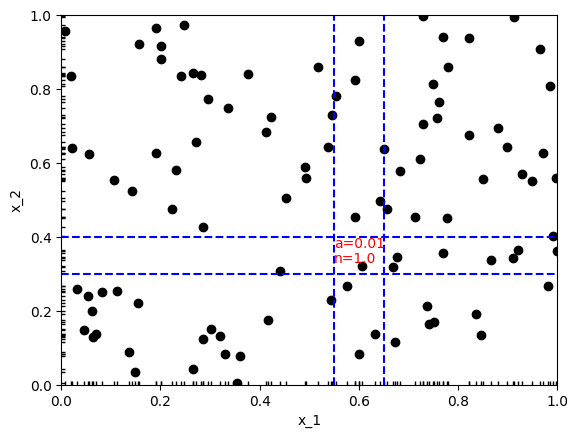

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x_1 = np.random.uniform(low=0, high=1, size=n)
x_2 = np.random.uniform(low=0, high=1, size=n)
r_1 = 0.10
r_2 = 0.10
a_2_est = np.sum(((x_1 > 0.55) & (x_1 < 0.65)) & ((x_2 > 0.3) & (x_2 < 0.4))) / n
n_2_est = a_2_est * n

plt.figure()
plt.scatter(x_1, x_2, label="x_2 vs x_1", color='black')  # Scatter plot for x_2 vs x_1
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.plot(x_1, np.zeros_like(x_1), '|', color='black')  # Rug plot for x_1
plt.plot(np.zeros_like(x_2), x_2, '_', color='black')  # Rug plot for x_2
plt.axvline(x=0.55, linestyle='--', color='blue')
plt.axhline(y=0.3, linestyle='--', color='blue')
plt.axvline(x=0.65, linestyle='--', color='blue')
plt.axhline(y=0.4, linestyle='--', color='blue')
plt.text(0.55, 0.37, f"a={round(a_2_est, 2)}", color='red')
plt.text(0.55, 0.33, f"n={round(n_2_est, 0)}", color='red')

plt.show()

Let's expand $l$ according to what we already calculated to see if we can capture the about the same amount of observations (10%).

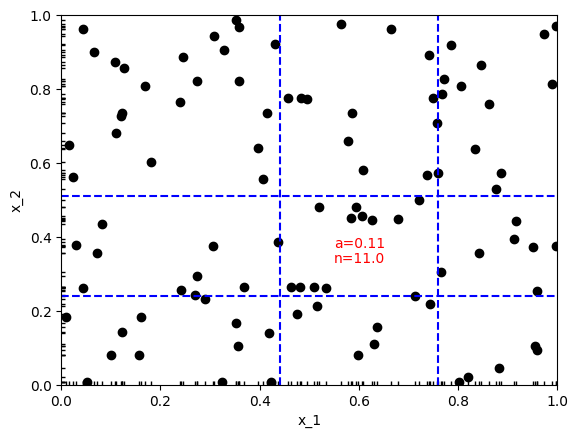

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x_1 = np.random.uniform(low=0, high=1, size=n)
x_2 = np.random.uniform(low=0, high=1, size=n)
r_1 = 0.10
r_2 = 0.10
a_2_est = np.sum(((x_1 > 0.44) & (x_1 < 0.76)) & ((x_2 > 0.24) & (x_2 < 0.51))) / n
n_2_est = a_2_est * n

plt.figure()
plt.scatter(x_1, x_2, label="x_2 vs x_1", color='black')  # Creating an empty plot to set the limits and labels
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.plot(x_1, np.zeros_like(x_1), '|', color='black')  # Rug plot for x_1
plt.plot(np.zeros_like(x_2), x_2, '_', color='black')  # Rug plot for x_2
plt.axvline(x=0.44, linestyle='--', color='blue')
plt.axhline(y=0.24, linestyle='--', color='blue')
plt.axvline(x=0.76, linestyle='--', color='blue')
plt.axhline(y=0.51, linestyle='--', color='blue')
plt.text(0.55, 0.37, f"a={round(a_2_est, 2)}", color='red')
plt.text(0.55, 0.33, f"n={round(n_2_est, 0)}", color='red')

plt.show()

But we go another way: rather than expand $l$, we could fill the same $l$ with more data.  

Say we have $n$ total observations in $p$ dimensions, of which $a_p = r^p$ are available.  This means that the total number of observations available is $na_p = nr^p$.  We also have another set of observations in $q$ dimensions such that the proportion available is $a_q = r^q$.  How many observations $m$ of the $q-dimensional$ data do wee need to get the same number of available observations as for the $p-dimensional$ data?

$$nr^p = mr^q$$
$$\rightarrow log(n) + p*log(r) = log(m) + q*log(r)$$
$$\rightarrow log(m) = log(n) + p*log(r) - q*log(r)$$
$$\rightarrow m = exp(log(m)) = exp(log(n) + p*log(r) - q*log(r))$$

So if $n=100$, $r=0.10$, $p=1$, and $q=2$, then plugging in the numbers means that we need $m=1000$ observations from the 2-dimensional data; a 10x increase. Let's simulate this.

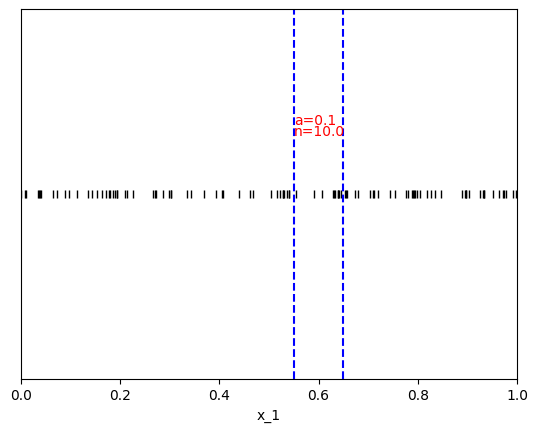

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
r = 0.1
x = np.random.uniform(low=0, high=1, size=n)
a_1_est = np.sum((x > 0.55) & (x < 0.65)) / n
n_1_est = a_1_est * n

plt.figure()
plt.plot(x, np.zeros_like(x), ' ', label="x_1")  # Creating an empty plot to set the x-axis limits
plt.xlim(0, 1)
plt.ylim(-0.1, 0.1)
plt.yticks([])  # Remove y-axis ticks
plt.xlabel("x_1")

plt.plot(x, np.zeros_like(x), '|', color='black')  # Rug plot
plt.axvline(x=0.55, linestyle='--', color='blue')
plt.axvline(x=0.65, linestyle='--', color='blue')
plt.text(0.55, 0.038, f"a={round(a_1_est, 2)}", color='red')
plt.text(0.55, 0.032, f"n={round(n_1_est, 0)}", color='red')

plt.show()

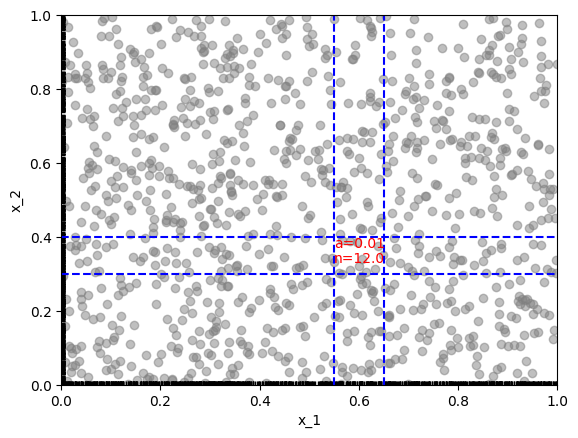

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 1000
x_1 = np.random.uniform(low=0, high=1, size=m)
x_2 = np.random.uniform(low=0, high=1, size=m)
r_1 = 0.10
r_2 = 0.10
a_2_est = np.sum(((x_1 > 0.55) & (x_1 < 0.65)) & ((x_2 > 0.3) & (x_2 < 0.4))) / m
n_2_est = a_2_est * m

plt.figure()
plt.scatter(x_1, x_2, color='grey', label="x_2 vs x_1", alpha=0.5)  # Scatter plot for x_2 vs x_1
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("x_1")
plt.ylabel("x_2")

plt.plot(x_1, np.zeros_like(x_1), '|', color='black')  # Rug plot for x_1
plt.plot(np.zeros_like(x_2), x_2, '_', color='black')  # Rug plot for x_2
plt.axvline(x=0.55, linestyle='--', color='blue')
plt.axhline(y=0.3, linestyle='--', color='blue')
plt.axvline(x=0.65, linestyle='--', color='blue')
plt.axhline(y=0.4, linestyle='--', color='blue')
plt.text(0.55, 0.37, f"a={round(a_2_est, 2)}", color='red')
plt.text(0.55, 0.33, f"n={round(n_2_est, 0)}", color='red')

plt.show()

### Question 5
We now examine the differences between LDA and QDA.

> (a) If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?

> (b) If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?

> (c) In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?

> (d) True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer.

#### Answer to a
***If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?***

In general, we expect more-flexible methods to perform better on training data.  In this case, that means that we expect QDA to generally do better than LDA on the training data *even though* the Bayes' decision boundary is linear.  However, on the test data, overly-flexible models pay a penalty.  Thus, we should expect LDA to do better than QDA on the test set.

I think we should test this out with simulation.  First I'll make some data: two variables, both normal distributions with equal variance but different means.

In [ ]:
import numpy as np

n = 10
x1 = np.random.normal(loc=-1, scale=1, size=n)
x2 = np.random.normal(loc=1, scale=1, size=n)

We can see see what this data *should* look like by plotting the theoretical distributions.

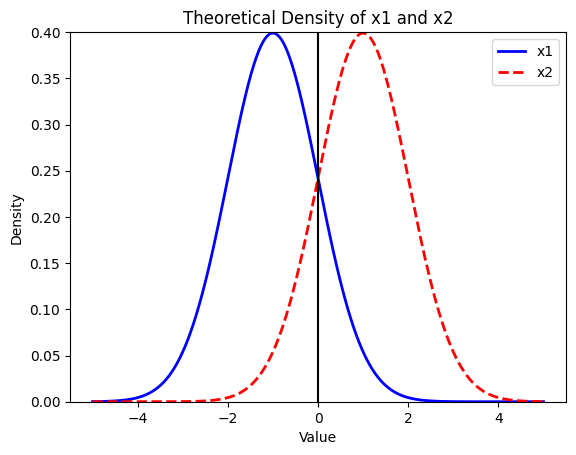

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def density_x1(x):
    return np.exp(-0.5*((x + 1)/1)**2) / (1 * np.sqrt(2 * np.pi))

def density_x2(x):
    return np.exp(-0.5*((x - 1)/1)**2) / (1 * np.sqrt(2 * np.pi))

x = np.linspace(-5, 5, 1000)

plt.plot(x, density_x1(x), color='blue', linewidth=2, label='x1')
plt.plot(x, density_x2(x), color='red', linewidth=2, linestyle='--', label='x2')
plt.axvline(x=0, color='black')
plt.ylim(0, 0.4)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Theoretical Density of x1 and x2')
plt.legend()
plt.show()


But when we sample from those distributions, which we did to generate `x1` and `x2`, we'll get something like

Mean of x1: -1.31
Standard deviation of x1: 0.73
Mean of x2: 1.32
Standard deviation of x2: 1.45


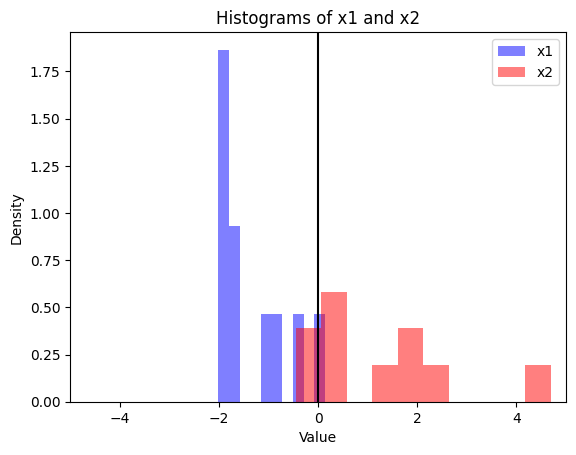

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define data
n = 10
x1 = np.random.normal(loc=-1, scale=1, size=n)
x2 = np.random.normal(loc=1, scale=1, size=n)

# Calculate mean and standard deviation
mean_x1 = np.mean(x1)
std_x1 = np.std(x1)
mean_x2 = np.mean(x2)
std_x2 = np.std(x2)

print("Mean of x1:", round(mean_x1, 2))
print("Standard deviation of x1:", round(std_x1, 2))
print("Mean of x2:", round(mean_x2, 2))
print("Standard deviation of x2:", round(std_x2, 2))

# Create histograms
plt.hist(x1, bins=10, density=True, color='blue', alpha=0.5, label='x1')
plt.hist(x2, bins=10, density=True, color='red', alpha=0.5, label='x2')
plt.axvline(x=0, color='black')
plt.xlim(-5, 5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histograms of x1 and x2')
plt.legend()
plt.show()


Notice that, although the data is gernerated from distributions with equal variances, the empirical standard deviations differ.

Now let's carve our data into a training set (80%) and a testing set (20%).

In [ ]:
import pandas as pd

train_portion = 0.80
train_ind = np.arange(0, round(train_portion * len(x1)))

x1_train = x1[train_ind]
x2_train = x2[train_ind]
x1_test = np.delete(x1, train_ind)
x2_test = np.delete(x2, train_ind)

train_set = pd.DataFrame({"class": np.repeat(["x1", "x2"], len(train_ind)),
                          "value": np.concatenate([x1_train, x2_train])})

test_set = pd.DataFrame({"class": np.repeat(["x1", "x2"], len(x1) - len(train_ind)),
                         "value": np.concatenate([x1_test, x2_test])})

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(train_set[['value']], train_set['class'])

# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(train_set[['value']], train_set['class'])


In [ ]:
# LDA predictions
lda_preds = lda.predict_proba(test_set[['value']])
lda_preds_df = pd.DataFrame(np.round(lda_preds, 2))
lda_test_preds = lda_preds_df.apply(lambda row: lda_preds_df.columns[np.argmax(row)], axis=1)
lda_test_actual = test_set['class']
lda_err = np.where(lda_test_actual == "x1", 1 - lda_preds[:, 0], 1 - lda_preds[:, 1])
lda_preds_df['pred'] = lda_test_preds
lda_preds_df['actual'] = lda_test_actual
lda_preds_df['error'] = lda_err
lda_err_sum = sum(lda_preds_df['error'])

# QDA predictions
qda_preds = qda.predict_proba(test_set[['value']])
qda_preds_df = pd.DataFrame(np.round(qda_preds, 2))
qda_test_preds = qda_preds_df.apply(lambda row: qda_preds_df.columns[np.argmax(row)], axis=1)
qda_test_actual = test_set['class']
qda_err = np.where(qda_test_actual == "x1", 1 - qda_preds[:, 0], 1 - qda_preds[:, 1])
qda_preds_df['pred'] = qda_test_preds
qda_preds_df['actual'] = qda_test_actual
qda_preds_df['error'] = qda_err
qda_err_sum = sum(qda_preds_df['error'])

print("LDA error sum:", lda_err_sum)
print("QDA error sum:", qda_err_sum)


LDA error sum: 0.5677573756132092
QDA error sum: 0.41280937335322


Thre final output is an estimate of the total error from the `lda.fit` and `qda.fit`.

Let me condense everyting into a single code block so we can repeat the experiment many times quickly.

In [ ]:
n = 10
x1 = np.random.normal(loc=-1, scale=1, size=n)
x2 = np.random.normal(loc=1, scale=1, size=n)

############################

train_portion = 0.80
train_ind = np.arange(0, round(train_portion * len(x1)))

x1_train = x1[train_ind]
x2_train = x2[train_ind]
x1_test = np.delete(x1, train_ind)
x2_test = np.delete(x2, train_ind)

train_set = pd.DataFrame({"class": np.repeat(["x1", "x2"], len(train_ind)),
                          "value": np.concatenate([x1_train, x2_train])})

test_set = pd.DataFrame({"class": np.repeat(["x1", "x2"], len(x1) - len(train_ind)),
                         "value": np.concatenate([x1_test, x2_test])})

############################

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(train_set[['value']], train_set['class'])

# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(train_set[['value']], train_set['class'])

##############################

lda.preds <- as.data.frame(round(predict(lda.fit, test_set)$posterior,2))
lda.test_preds <- colnames(lda.preds)[apply(lda.preds, 1, which.max)]
lda.test_actual <- test_set$class
lda.err <- ifelse(test = lda.test_actual=="x1",
                  yes = (1-lda.preds$x1),
                  no = (1-lda.preds$x2))
lda.preds <- cbind(lda.preds, pred = lda.test_preds, actual = lda.test_actual, error=lda.err)


qda.preds <- as.data.frame(round(predict(qda.fit, test_set)$posterior,2))
qda.test_preds <- colnames(qda.preds)[apply(qda.preds, 1, which.max)]
qda.test_actual <- test_set$class
qda.err <- ifelse(test = qda.test_actual=="x1",
                  yes = (1-qda.preds$x1),
                  no = (1-qda.preds$x2))
qda.preds <- cbind(qda.preds, pred = qda.test_preds, actual = qda.test_actual, error=qda.err)

sum(lda.preds$error)
sum(qda.preds$error)

LDA error sum: 0.0485887907090744
QDA error sum: 0.037380912799030774


Run this several times.  In general, LDA should do better than QDA...but not always.  Play with `n`; as `n` increases, the two methods should perform more similarly.  Why?  Because with more data, QDA will get a better estimate of the variances, which means that it will estimate them to be closer to one another with more data.

Okay, one more time.  Let's run this code `m` times in a for loop to test this.

Proportion of times LDA has lower error: 0.461
Mean LDA error rate: 0.9140690997683273
Mean QDA error rate: 0.9190080343846357


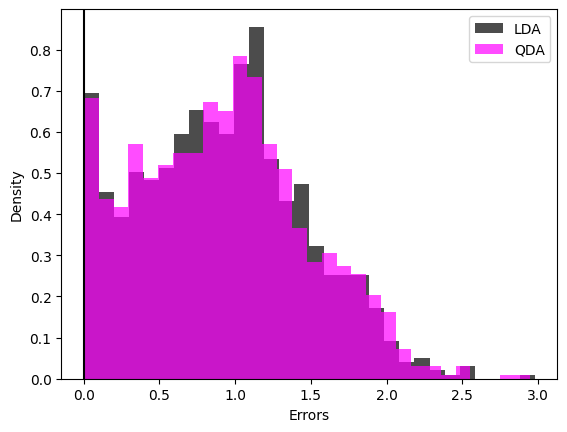

In [ ]:
m = 1000
n = 10
lda_errors = np.zeros(m)
qda_errors = np.zeros(m)
lda_best = np.zeros(m)

for i in range(m):
    x1 = np.random.normal(loc=-1, scale=1, size=n)
    x2 = np.random.normal(loc=1, scale=1, size=n)

    train_portion = 0.80
    train_ind = np.arange(0, round(train_portion * len(x1)))

    x1_train = x1[train_ind]
    x2_train = x2[train_ind]
    x1_test = np.delete(x1, train_ind)
    x2_test = np.delete(x2, train_ind)

    train_set = pd.DataFrame({"class": np.repeat(["x1", "x2"], len(train_ind)),
                              "value": np.concatenate([x1_train, x2_train])})

    test_set = pd.DataFrame({"class": np.repeat(["x1", "x2"], len(x1) - len(train_ind)),
                              "value": np.concatenate([x1_test, x2_test])})

    lda = LinearDiscriminantAnalysis()
    lda.fit(train_set[['value']], train_set['class'])

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(train_set[['value']], train_set['class'])

    lda_preds = lda.predict_proba(test_set[['value']])
    lda_err = np.where(test_set['class'] == "x1", 1 - lda_preds[:, 0], 1 - lda_preds[:, 1])
    lda_errors[i] = sum(lda_err)

    qda_preds = qda.predict_proba(test_set[['value']])
    qda_err = np.where(test_set['class'] == "x1", 1 - qda_preds[:, 0], 1 - qda_preds[:, 1])
    qda_errors[i] = sum(qda_err)

    lda_best[i] = lda_errors[i] <= qda_errors[i]

print("Proportion of times LDA has lower error:", sum(lda_best) / m)
print("Mean LDA error rate:", np.mean(lda_errors))
print("Mean QDA error rate:", np.mean(qda_errors))

plt.hist(lda_errors, bins=30, density=True, color="black", alpha=0.7, label="LDA")
plt.hist(qda_errors, bins=30, density=True, color="magenta", alpha=0.7, label="QDA")
plt.xlabel("Errors")
plt.ylabel("Density")
plt.legend()
plt.axvline(x=0, color="black")
plt.show()

According to our simulation, QDA (magenta) is more likely to have more total error than LDA (black); and LDA does as good or better than QDA most of the time.

What happens if the variances differ between the distributions?  We'll see in part b.

#### Answer to b
***If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?***

Now we probably expect QDA to do better on both sets of data.  Why? Because now the decision boundary is nonlinear--i.e., more complex--such that a more flexible approach should do better.

Let's use the previous simulation to test this, now setting the variances to be unequal.

Proportion of times LDA has lower error: 0.401
Mean LDA error rate: 0.9497751166594621
Mean QDA error rate: 0.9206446107657454


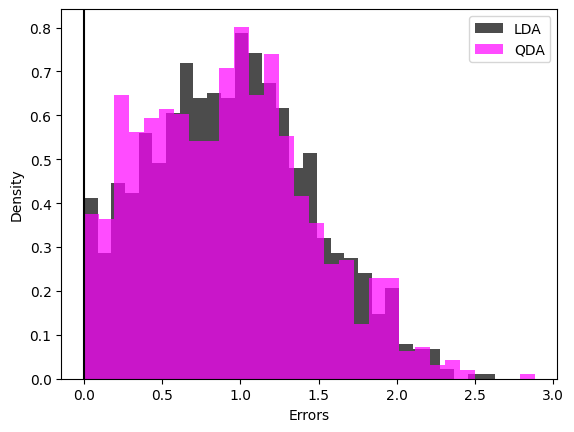

In [ ]:
m = 1000
n = 10
lda_errors = np.zeros(m)
qda_errors = np.zeros(m)
lda_best = np.zeros(m)

for i in range(m):
    x1 = np.random.normal(loc=-1, scale=0.75, size=n)
    x2 = np.random.normal(loc=1, scale=1.25, size=n)

    train_portion = 0.80
    train_ind = np.arange(0, round(train_portion * len(x1)))

    x1_train = x1[train_ind]
    x2_train = x2[train_ind]
    x1_test = np.delete(x1, train_ind)
    x2_test = np.delete(x2, train_ind)

    train_set = pd.DataFrame({"class": np.repeat(["x1", "x2"], len(train_ind)),
                              "value": np.concatenate([x1_train, x2_train])})

    test_set = pd.DataFrame({"class": np.repeat(["x1", "x2"], len(x1) - len(train_ind)),
                              "value": np.concatenate([x1_test, x2_test])})

    lda = LinearDiscriminantAnalysis()
    lda.fit(train_set[['value']], train_set['class'])

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(train_set[['value']], train_set['class'])

    lda_preds = lda.predict_proba(test_set[['value']])
    lda_err = np.where(test_set['class'] == "x1", 1 - lda_preds[:, 0], 1 - lda_preds[:, 1])
    lda_errors[i] = sum(lda_err)

    qda_preds = qda.predict_proba(test_set[['value']])
    qda_err = np.where(test_set['class'] == "x1", 1 - qda_preds[:, 0], 1 - qda_preds[:, 1])
    qda_errors[i] = sum(qda_err)

    lda_best[i] = lda_errors[i] <= qda_errors[i]

print("Proportion of times LDA has lower error:", sum(lda_best) / m)
print("Mean LDA error rate:", np.mean(lda_errors))
print("Mean QDA error rate:", np.mean(qda_errors))

plt.hist(lda_errors, bins=30, density=True, color="black", alpha=0.7, label="LDA")
plt.hist(qda_errors, bins=30, density=True, color="magenta", alpha=0.7, label="QDA")
plt.xlabel("Errors")
plt.ylabel("Density")
plt.legend()
plt.axvline(x=0, color="black")
plt.show()

Now QDA is usually doing better, with LDA only doing as well less than half the time.

#### Answer to c
***In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?***

I assume this is referring to linear decision boundaries, since that's when LDA should perform better than QDA.  We've already answered this in part a.  With larger samples sizes, we get more accurate estimates of variance...which means more likely to notice that the estimates of variance converge.  Hence, we should see QDA and LDA performance converge.

Let's again look at the simulation, now paying attention to the difference in error between LDA and QDA on a linear decision boundary, with a larger sample size `n`.

Proportion of times LDA has lower error: 0.415
Mean LDA error rate: 1.3682832220922234
Mean QDA error rate: 1.364574750479696


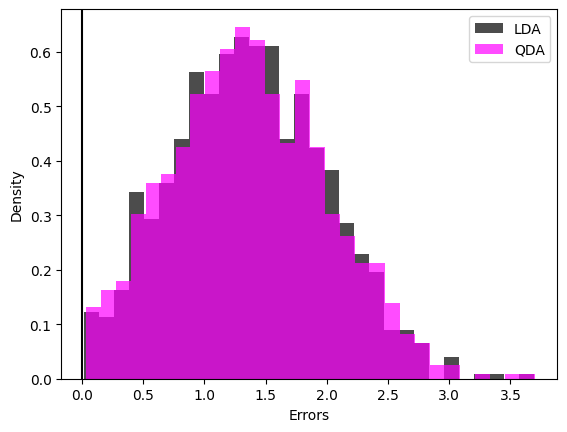

In [ ]:
m = 1000
n = 15
lda_errors = np.zeros(m)
qda_errors = np.zeros(m)
lda_best = np.zeros(m)

for i in range(m):
    x1 = np.random.normal(loc=-1, scale=1, size=n)
    x2 = np.random.normal(loc=1, scale=1, size=n)

    train_portion = 0.80
    train_ind = np.arange(0, round(train_portion * len(x1)))

    x1_train = x1[train_ind]
    x2_train = x2[train_ind]
    x1_test = np.delete(x1, train_ind)
    x2_test = np.delete(x2, train_ind)

    train_set = pd.DataFrame({"class": np.repeat(["x1", "x2"], len(train_ind)),
                              "value": np.concatenate([x1_train, x2_train])})

    test_set = pd.DataFrame({"class": np.repeat(["x1", "x2"], len(x1) - len(train_ind)),
                              "value": np.concatenate([x1_test, x2_test])})

    lda = LinearDiscriminantAnalysis()
    lda.fit(train_set[['value']], train_set['class'])

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(train_set[['value']], train_set['class'])

    lda_preds = lda.predict_proba(test_set[['value']])
    lda_err = np.where(test_set['class'] == "x1", 1 - lda_preds[:, 0], 1 - lda_preds[:, 1])
    lda_errors[i] = sum(lda_err)

    qda_preds = qda.predict_proba(test_set[['value']])
    qda_err = np.where(test_set['class'] == "x1", 1 - qda_preds[:, 0], 1 - qda_preds[:, 1])
    qda_errors[i] = sum(qda_err)

    lda_best[i] = lda_errors[i] <= qda_errors[i]

print("Proportion of times LDA has lower error:", sum(lda_best) / m)
print("Mean LDA error rate:", np.mean(lda_errors))
print("Mean QDA error rate:", np.mean(qda_errors))

plt.hist(lda_errors, bins=30, density=True, color="black", alpha=0.7, label="LDA")
plt.hist(qda_errors, bins=30, density=True, color="magenta", alpha=0.7, label="QDA")
plt.xlabel("Errors")
plt.ylabel("Density")
plt.legend()
plt.axvline(x=0, color="black")
plt.show()

#### Answer to d
***True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer.***

False, the flexibilty of QDA will tend to cause overfitting when the decision boundary is linear since that excess flexibility will accommodate learning the randomness in the sample and misattributing it to signal.

### Question 6
Suppose we collect data for a group of students in a statistics class with variables $X_1$ = hours studied, $X_2$ = undergrad GPA, and $Y$ = receive an A. We fit a logistic regression and produce estimated coefficient, $\hat{β}_0 = −6$, $\hat{β}_1 = 0.05$, and $\hat{β}_2 = 1$.

> (a) Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.

> (b) How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?

#### Answers
Let's start by remembering what our logistic formula is telling us.  The probabilty of receiving an A, $p(Y)$ is a function of hours studied, $X_1$, and undergrad GPA, $X_2$.  The function is:

$$p(Y) = \frac{exp(\beta_0 + \beta_1 X_1 + \beta_2 X_2)}{1 + exp(\beta_0 + \beta_1 X_1 + \beta_2 X_2)}$$

Importantly, we can write a related expression for the *log odds* of $Y$.

$$ln[\frac{p(Y)}{1-p(Y)}] = \beta_0 + \beta_1 X_1 + \beta_2 X_2$$

##### Answer to a
***Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.***

To answer this, we simply plug in the given values for $X_1$ and $X_2$.

$$p(Y) = \frac{exp(-6 + 0.05*40 + 1*3.5)}{1 + exp(-6 + 0.05*40 + 1*3.5)} = 37.75\%$$

##### Answer to b
***How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?***

Now we're given $p(Y)$ and $X_2$, but need to solve for $X_1$.  We could go the long way here, using algebra to solve for $X_1$ from our expression for $p(Y)$.  But let's use a short cut.

Recall that logistic regression is just a linear model for *log-odds*, where log odds is

$$ln[\frac{p(Y)}{1-p(Y)}] = \beta_0 + \beta_1 X_1 + \beta_2 X_2$$

This expression will be much easier to solve for $X_1$.

$$X_1 = \frac{ln[\frac{p(Y)}{1-p(Y)}] - \beta_0 - \beta_2 X_2}{\beta_1}$$

Now we just plug in the values we're given:

$$X_1 = \frac{ln[\frac{0.50}{0.50}] - -6 - 1(3.5)}{0.05} = \frac{ln[1] + 6 - 3.5}{0
.05} = \frac{0 + 2.5}{0.05} = 50 hours$$

### Question 7
Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on $X$, last year’s percent profit. We examine a large number of companies and discover that the mean value of $X$ for companies that issued a dividend was $\bar{X} = 10$, while the mean for those that didn’t was $\bar{X} = 0$. In addition, the variance of $X$ for these two sets of companies was $\hat{\sigma}^2 = 36$. Finally, 80% of companies issued dividends. Assuming that $X$ follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was $X = 4$ last year.

*Hint: Recall that the density function for a normal random variable is $f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$. You will need to use Bayes’ theorem.*

#### Answer
This is straightforward.  Wee need to apply Bayes' to find the posterior

$$p(Yes | X=4) = p(Yes | X=4, \hat{\mu}=\bar{X}=10, \hat{\sigma}^2=36, p(Yes)=0.80)$$
\
$$= \frac{p(X=4 | Yes) * p(Yes)}{p(X=4)}$$
\
$$= \frac{p(X=4 | Yes) * p(Yes)}{p(X=4 | Yes) * p(Yes) + p(X=4 | No) * p(No)}$$
\
$$= \frac{\frac{1}{\sqrt{72\pi}} e^{-\frac{(4-10)^2}{2*36}} * 0.80}{\frac{1}{\sqrt{72\pi}} e^{-\frac{(4-10)^2}{2*36}} * 0.80 + \frac{1}{\sqrt{72\pi}} e^{-\frac{(4-0)^2}{2*36}} * 0.20}
= \frac{\frac{1}{\sqrt{72\pi}} e^{-\frac{36}{72}} * 0.80}{\frac{1}{\sqrt{72\pi}}(0.80 e^{-\frac{36}{72}} + 0.20 e^{-\frac{16}{72}})}
= \frac{0.80 e^{-\frac{1}{2}}}{0.80 e^{-\frac{1}{2}} + 0.20 e^{-\frac{2}{9}}}
\approx \frac{0.4852}{0.4852 + 0.1601} \approx 75.19%$$

Recall that LDA is the application of this Bayesian classification, assuming that the data is normally distributed and the different classes have the same variance.  So let's test this; LDA should give us the same answer.  I'll start by generating some fake data.

In [ ]:
import pandas as pd
import numpy as np

dividend = ["Yes"] * 80 + ["No"] * 20

Xyes = np.random.normal(loc=10, scale=6, size=80)
Xno = np.random.normal(loc=0, scale=6, size=20)

data = pd.DataFrame({
    "dividend": dividend,
    "X": np.concatenate([Xyes, Xno])
})

print(data.head())

  dividend          X
0      Yes   5.131918
1      Yes  14.657946
2      Yes   8.016283
3      Yes   7.436204
4      Yes  16.905178


Now run `lda()`.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

X = data[['X']]  # Features: 'X' column
y = data['dividend']  # Target: 'dividend' column

lda_model = LinearDiscriminantAnalysis()

lda_model.fit(X, y)

LinearDiscriminantAnalysis()

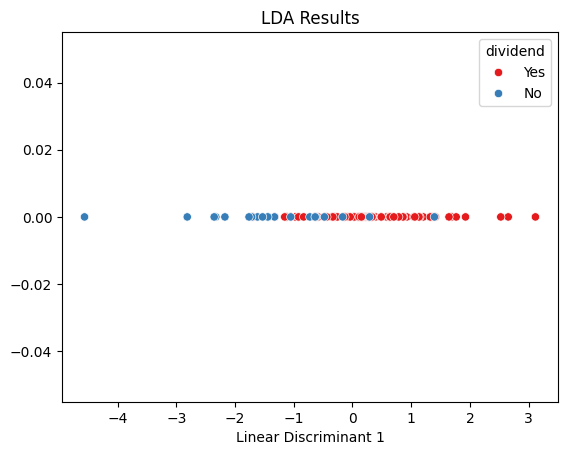

In [ ]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

X_lda = lda_model.transform(X)

lda_df = pd.DataFrame(X_lda, columns=['LD1'])
lda_df['dividend'] = y

sns.scatterplot(data=lda_df, x='LD1', y=0, hue='dividend', palette='Set1', legend='full')
plt.title('LDA Results')
plt.xlabel('Linear Discriminant 1')
plt.show()

We can see the priors are correct (Yes=80%, No=20%) and the means are approximately correct ($\bar{X}_{Yes} \approx 10$, $\bar{X}_{No} \approx 0$).

We can also see the histograms of $Dividend=Yes$ and $Dividend=No$; $X=4$ looks to be safely in the $Yes$ category.

So let's look at how our LDA categorized $X=4$ and it's posterior probability.

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

new_obs = pd.DataFrame({"X": [4]})

predicted_class = lda_model.predict(new_obs)

print("Predicted class:", predicted_class[0])

probabilities = lda_model.predict_proba(new_obs)

print("Probabilities:", probabilities)

Predicted class: Yes
Probabilities: [[0.19196301 0.80803699]]


LDA predicts `$class = "Yes"` with a `$posterior` probability of $\approx 75.19$, which is what we found with Bayes'.  The discrepancy is due to sampling error.

### Question 8
Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e. $K = 1$) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

#### Answer
The question is a bit tricky because there is no training-error rate with K-nearest neighbor; training data is used for training because we already know the correct categories of each data point.  Thus, if we take

$$\bar{\epsilon}_{KNN} = \frac{\epsilon_{train} + \epsilon_{test}}{2}$$

then

$$2\bar{\epsilon}_{KNN} = 0 + \epsilon_{test}$$
$$\rightarrow \epsilon_{test} = 2(0.18) = 0.36$$

which is greater than the 30% error rate from logistic regression.  Hence, we should use logistic regression here.

### Question 9
This problem has to do with odds.

> (a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?

> (b) Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?

#### Answers
Let's recount what odds are.
$$odds = O = \frac{p}{1-p}$$
where $p$ is the probability of an event.  So "odds" is the ratio of *the probability an event A will occur* over *the probability that A will NOT occur*.

##### Answer to a
***On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?***

If the *Event* is defaulting, then we need to solve $O(default) = 0.37 = \frac{p}{1-p}$ for $p$.

Generally, we can solve for $p$ like

$$O=\frac{p}{1-p}$$
$$\rightarrow O(1-p) = O-Op = p$$
$$\rightarrow O=p + Op= p(1+O)$$
$$\rightarrow p = \frac{O}{1+O}$$

So plugging in $O=0.37$, we get

$$p = \frac{0.37}{1 + 0.37} \approx 0.27$$

##### Answer to b
***Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?***

Just using our definition of odds and plugging in $p=0.16$, we get

$$O(default|p=0.16) = \frac{0.16}{1-0.16} \approx 0.19$$

### Question 10❗
Equation 4.32 (p. 168) derived an expression for $log(\frac{Pr(Y =k|X=x)}{Pr(Y =K|X=x)})$(See NOTE below) in the setting where $p > 1$, so that the mean for the $k^{th}$ class, $µ_k$, is a $p$-dimensional vector, and the shared covariance $Σ$ is a $p × p$ matrix. However, in the setting with $p = 1$, (4.32) takes a simpler form, since the means $µ_1,...,µ_K$ and the variance $σ^2$ are scalars. In this simpler setting, repeat the calculation in (4.32), and provide expressions for $a_k$ and $b_{kj}$ in terms of $π_k$, $π_K$, $µ_k$, $µ_K$, and $σ^2$.

> NOTE: The derived expression is
> $$log(\frac{Pr(Y =k|X=x)}{Pr(Y =K|X=x)}) = a_k + \sum_{j=1}^P b_{kj}x_j$$
> where
> $$a_k = log(\frac{\pi_k}{\pi_K})-\frac{1}{2}(\mu_k + \mu_K)^T \Sigma^{-1}(\mu_k - \mu_K)$$
$$b_{kj} = \Sigma_j^{-1}(\mu_k - \mu_K)$$

#### Answer
For context, (4.32) is set in section 4.5.1, where the authors are comparing LDA, QDA, naive Bayes, and logistic regression--where we are trying to categorize observations among $K$ classes.  With each method, we are trying to assign each observation to the class $k$ for which $p(Y=k|X=x)$ is greatest.   Doing this is equivalent to assigning each observation to the class $k$ for which $log(\frac{Pr(Y =k|X=x)}{Pr(Y =K|X=x)})$ is greatest.

You can follow along with the steps provided for (4.32).  


\begin{align*}
\log\left(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)}\right)
 & = \log\left(\frac{\pi_k f_k(x)}{\pi_K f_K(x)}\right) \\
 & = \log\left(\frac{\pi_k \exp(-\frac{1}{2}((x-\mu_k)/\sigma)^2)}{\pi_K \exp(-\frac{1}{2}((x-\mu_K)/\sigma)^2)}\right) \\
 & = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{1}{2} \left(\frac{x-\mu_k}{\sigma}\right)^2 + \frac{1}{2} \left(\frac{x-\mu_K}{\sigma}\right)^2 \\
 & = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{1}{2\sigma^2} (x-\mu_k)^2 + \frac{1}{2\sigma^2} (x-\mu_K)^2 \\
 & = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{1}{2\sigma^2} \left((x-\mu_k)^2 - (x-\mu_K)^2\right) \\
 & = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{1}{2\sigma^2} \left(x^2-2x\mu_k+\mu_k^2 - x^2 + 2x\mu_K - \mu_K^2\right) \\
 & = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{1}{2\sigma^2} \left(2x(\mu_K - \mu_k) + \mu_k^2 -\mu_K^2\right) \\
 & = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{\mu_k^2 -\mu_K^2}{2\sigma^2} + x \frac{\mu_k - \mu_K}{\sigma^2} \\
 & = a_k + \sum_{j=1}^p b_{kj} x_j
\end{align*}

where

$$a_k = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{\mu_k^2 -\mu_K^2}{2\sigma^2}$$

and

$$b_k = \frac{(\mu_k - \mu_K)}{\sigma^2}$$

Notice the similarity of the expression we derived here:

$$d_k(x) = \log\left(\frac{\pi_k}{\pi_K}\right) - \frac{\mu_k^2 -\mu_K^2}{2\sigma^2} + x \frac{\mu_k - \mu_K}{\sigma^2}$$

to the expression (here, slightly rearranged) we derived for $\delta_k^{LDA}(x)$ in Question 2:

$$\delta_k^{LDA}(x) = log(\pi_k) - \frac{\mu_k^2}{2 \sigma^2} + x \frac{\mu_k}{\sigma^2}$$

It should make since that, since each class $k$ is being compared against the same reference $K$, the class with the greatest $d_k(x)$ will also have the greatest $\delta_k^{LDA}(x)$.  In effect, we can *drop* all $K$-references from $d_k(x)$ to get $\delta_k^{LDA}(x)$.

### Question 11❗
Work out the detailed forms of $a_k$, $c_{kj}$ , and $b_{kjl}$ in (4.33).

$$\log\left(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)}\right)
= a_k + \sum_{j=1}^p b_{kj}x_j + \sum_{j=1}^p \sum_{l=1}^p c_{kjl} x_j x_l$$

Your answer should involve $π_k$, $π_K$, $µ_k$, $µ_K$, $Σ_k$, and $Σ_K$.

#### Answer
Here, we'll retrace the steps taken in (4.32), but now assuming different covariance matrixes $\Sigma_k$ among the classes $k$.

\begin{align*}
\log\left(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)}\right)
 & = \log\left(\frac{\pi_k f_k(x)}{\pi_K f_K(x)}\right) \\
 & = \log\left(\frac{\pi_k \exp(-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)}{\pi_K \exp(-\frac{1}{2}(x-\mu_K)^T\Sigma_K^{-1}(x-\mu_K)}\right) \\
 & = \log\left(\frac{\pi_k}{\pi_K} \right) +
 (- \frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) -
 (- \frac{1}{2}(x-\mu_K)^T\Sigma_K^{-1}(x-\mu_K)))\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right)
 - \frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)
 + \frac{1}{2}(x-\mu_K)^T\Sigma_K^{-1}(x-\mu_K)\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right)
 - \frac{1}{2}((x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)
 - (x-\mu_K)^T\Sigma_K^{-1}(x-\mu_K))\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right)
 + \frac{1}{2}((x-\mu_K)^T\Sigma_K^{-1}(x-\mu_K)
 - (x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k))\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right) + \frac{1}{2}
 ((x^T \Sigma_K^{-1} x
 - x^T \Sigma_K^{-1} \mu_K
 - \mu_K^T \Sigma_K^{-1} x
 + \mu_K^T \Sigma_K^{-1} \mu_K)
 - (x^T \Sigma_k^{-1} x
 - x^T \Sigma_k^{-1} \mu_k
 - \mu_k^T \Sigma_k^{-1} x
 + \mu_k^T \Sigma_k^{-1} \mu_k))\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right) + \frac{1}{2}
 (x^T \Sigma_K^{-1} x
 - x^T \Sigma_K^{-1} \mu_K
 - \mu_K^T \Sigma_K^{-1} x
 + \mu_K^T \Sigma_K^{-1} \mu_K
 -x^T \Sigma_k^{-1} x
 + x^T \Sigma_k^{-1} \mu_k
 + \mu_k^T \Sigma_k^{-1} x
 - \mu_k^T \Sigma_k^{-1} \mu_k)\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right) +
 \frac{1}{2}(\mu_K^T \Sigma_K^{-1} \mu_K - \mu_k^T \Sigma_k^{-1} \mu_k)
 + \frac{1}{2}(x^T \Sigma_k^{-1} \mu_k + \mu_k^T \Sigma_k^{-1} x - x^T \Sigma_K^{-1} \mu_K - \mu_K^T \Sigma_K^{-1} x)
 + \frac{1}{2}(x^T \Sigma_K^{-1} x - x^T \Sigma_k^{-1} x)\\
 & = \log\left(\frac{\pi_k}{\pi_K} \right) +
 \frac{1}{2}(\mu_K^T \Sigma_K^{-1} \mu_K - \mu_k^T \Sigma_k^{-1} \mu_k)
 + \frac{1}{2}(x^T (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K) + (\mu_k^T \Sigma_k^{-1} - \mu_K^T \Sigma_K^{-1})x)
+ \frac{1}{2}(x^T (\Sigma_K^{-1} - \Sigma_k^{-1}) x)\\
 & = a_k + \sum_{j=1}^p b_{kj}x_j + \sum_{j=1}^p \sum_{l=1}^p c_{kjl} x_j x_l
\end{align*}

where

>$a_k = \log\left(\frac{\pi_k}{\pi_K} \right) +
 \frac{1}{2}(\mu_K^T \Sigma_K^{-1} \mu_K - \mu_k^T \Sigma_k^{-1} \mu_k)$,

> $\sum_{j=1}^p b_{kj}x_j = \frac{1}{2}(x^T (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K) + (\mu_k^T \Sigma_k^{-1} - \mu_K^T \Sigma_K^{-1})x)$,

> and

> $\sum_{l=1}^p c_{kjl} x_j x_l = \frac{1}{2}(x^T (\Sigma_K^{-1} - \Sigma_k^{-1}) x)$ such that $c_{kjl} = \frac{1}{2}(\Sigma_K^{-1} - \Sigma_k^{-1})_{jl}$.

\

To get $\sum_{j=1}^p b_{kj}x_j$ into its final form, realize that both $x^T (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K)$ and $(\mu_k^T \Sigma_k^{-1} - \mu_K^T \Sigma_K^{-1})x$ are scalars of equal value.  Taking the transpose of a scalar returns the same value so that
$x^T (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K) =
(x^T (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K))^T =
(\mu_k^T \Sigma_k^{-1} - \mu_K^T \Sigma_K^{-1})x =
((\mu_k^T \Sigma_k^{-1} - \mu_K^T \Sigma_K^{-1})x)^T$.  We need to add two terms; since each term is equal, let's pick two convenient ones: I'll choose the first and the last which, after applying the $T$ranspose to the last and then extracting the $x^T$ in common, simplifies to $x^T((\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K) + (\mu_k^T \Sigma_k^{-1} - \mu_K^T \Sigma_K^{-1})^T) = x^T((\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K) + (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K)) = x^T(2 (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K))$.

So altogether, we now have $\sum_{j=1}^p b_{kj}x_j = \frac{1}{2} x^T(2 (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K)) = x^T (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K)$.

Hence, $b_{kj} = (\Sigma_k^{-1} \mu_k - \Sigma_K^{-1} \mu_K)_j$

### Question 12
Suppose that you wish to classify an observation $X ∈ R$ into `apples` and `oranges`. You fit a logistic regression model and find that

$$\hat{Pr}(Y = orange|X = x) = \frac{\exp(\hat{β}_0 + \hat{β}_1x)}{1 + \exp(\hat{β}_0 + \hat{β}_1x)}$$.

Your friend fits a logistic regression model to the same data using the *softmax* formulation in (4.13),

and finds that

$$\hat{Pr}(Y = orange|X = x) = \frac{\exp(\hat{α}_{orange0} + \hat{α}_{orange1}x)}{\exp(\hat{α}_{orange0} + \hat{α}_{orange1}x) + \exp(\hat{α}_{apple0} + \hat{α}_{apple1}x)}$$.

> (a) What is the log odds of `orange` versus `apple` in your model?

> (b) What is the log odds of `orange` versus `apple` in your friend’s model?

> (c) Suppose that in your model, $\hat{β}_0 = 2$ and $\hat{β}_1 = −1$. What are the coefficient estimates in your friend’s model? Be as specific as possible.

> (d) Now suppose that you and your friend fit the same two models on a different data set. This time, your friend gets the coefficient estimates $\hat{α}_{orange0} = 1.2$, $\hat{α}_{orange1} = −2$, $\hat{α}_{apple0} = 3$, $\hat{α}_{apple1} = 0.6$. What are the coefficient estimates in your model?

> (e) Finally, suppose you apply both models from (d) to a data set with 2,000 test observations. What fraction of the time do you expect the predicted class labels from your model to agree with those from your friend’s model? Explain your answer.

#### Answer to a
***What is the log odds of orange versus apple in your model?***

Recall that the *log odds* is just $\ln(\frac{p}{1-p})$.  The expression we're given is for $p$, $p = \frac{\exp({X\beta})}{1 + exp(X\beta)}$.  So

$$\ln\left(\frac{p}{1-p}\right)
= \ln\left(\frac{\frac{\exp({X\beta})}{1 + \exp(X\beta)}}{1 - \frac{\exp({X\beta})}{1 + exp(X\beta)}}\right)
= \ln\left(\frac{\frac{\exp({X\beta})}{1 + \exp(X\beta)}}{\frac{1 + \exp(X\beta)}{1 + \exp(X\beta)} - \frac{\exp({X\beta})}{1 + \exp(X\beta)}}\right)
= \ln\left(\frac{\frac{\exp({X\beta})}{1 + \exp(X\beta)}}{\frac{1 + \exp(X\beta)-\exp(X\beta)}{1 + \exp(X\beta)}}\right)
=\ln\left(\frac{\frac{\exp({X\beta})}{1 + \exp(X\beta)}}{\frac{1}{1 + \exp(X\beta)}}\right)
= \ln\left(\frac{\exp(X\beta}{1 + \exp(X\beta)} \frac{1 + \exp(X\beta)}{1}\right) = \ln(\exp(X\beta)) = X\beta$$

So the log odds here are

$$logodds = \frac{\hat{Pr}(Y = orange|X = x)}{1 - \hat{Pr}(Y = orange|X = x)} = \hat{\beta}_0 + \hat{\beta}_1x$$

#### Answer to b
***What is the log odds of orange versus apple in your friend’s model?***

Let's go through the same exercise as part a, but with our friends softmax expression.  I'll use $\gamma$ to represent the otherwise-$\beta$ coefficeints for all but the class being evaluated in the numerator.

$$ln\left(\frac{p}{1-p}\right)
= ln\left(\frac{\frac{\exp(X\beta)}{\exp(X\beta) + \sum{\exp(X\gamma)}}}{1 - \frac{\exp(X\beta)}{\exp(X\beta) + \sum{\exp(X\gamma)}}}\right)
= ln\left(\frac{\frac{\exp(X\beta)}{\exp(X\beta) + \sum{\exp(X\gamma)}}}{\frac{\exp(X\beta) + \sum{\exp(X\gamma)}}{\exp(X\beta) + \sum{\exp(X\gamma)}} - \frac{\exp(X\beta)}{\exp(X\beta) + \sum{\exp(X\gamma)}}}\right)
= ln\left(\frac{\frac{\exp(X\beta)}{\exp(X\beta) + \sum{\exp(X\gamma)}}}{\frac{\exp(X\gamma)}{\exp(X\beta) + \sum{\exp(X\gamma)}}}\right)
= \ln\left(\frac{\exp(X\beta)}{\exp(X\beta) + \sum{\exp(X\gamma)}}\frac{\exp(X\beta) + \sum{\exp(X\gamma)}}{\sum{\exp(X\gamma)}}\right)
= \ln\left(\frac{\exp(X\beta)}{\sum\exp(X\gamma)}\right)
= \ln(\exp(X\beta)) - \ln\left(\sum\exp(X\gamma)\right) = X\beta - \ln(\sum\exp X\gamma)$$

In our problem, $\gamma$ is only assigned to one class, so this simplifies to $X\beta - X\gamma = X(\beta - \gamma)$

So thre log oods here are

$$logodds = \frac{\hat{Pr}(Y = orange|X = x)}{1 - \hat{Pr}(Y = orange|X = x)}
= (\hat{\alpha}_{orange0} - \hat{\alpha}_{apple0}) + x(\hat{\alpha}_{orange1} - \hat{\alpha}_{apple1})$$

#### Answer to c
***Suppose that in your model,  $\hat{β}_0 = 2$  and  $\hat{β}_1 = −1$ . What are the coefficient estimates in your friend’s model? Be as specific as possible.***

This just comes down to setting the two expressions for log odds equal to one another, enter the coefficient estimates from *our* expression, and solve for those of our friends.

$$our \ logodds = \hat{\beta}_0 + \hat{\beta}_1x = 2 - x$$

which implies

$$(\hat{\alpha}_{orange0} - \hat{\alpha}_{apple0}) = \hat{\beta}_0 = 2$$
$$(\hat{\alpha}_{orange1} - \hat{\alpha}_{apple1}) = \hat{\beta}_1 = -1$$

#### Answer to d
***Now suppose that you and your friend fit the same two models on a different data set. This time, your friend gets the coefficient estimates $\hat{α}_{orange0} = 1.2$, $\hat{α}_{orange1} = −2$, $\hat{α}_{apple0} = 3$, $\hat{α}_{apple1} = 0.6$. What are the coefficient estimates in your model?***

Just reversing what we did aboveL

$$friend's \ logodds = (1.2 - 3) + x(-2 - 0.6) = -1.8 - 1.4x$$

which implies

$$\hat{\beta}_0 = -1.8$$
$$\hat{\beta}_1 = -1.4$$
$$Our \ logodds = -1.8 -1.4x$$


#### Answer to e
***Finally, suppose you apply both models from (d) to a data set with 2,000 test observations. What fraction of the time do you expect the predicted class labels from your model to agree with those from your friend’s model? Explain your answer.***

Always; these are both valid and equivalent expressions of the log odds.  The coefficients will be estimated to fit the same value, $\hat{Pr}(Y = orange|X = x)$.